In [121]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

In [148]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')

<AxesSubplot:>

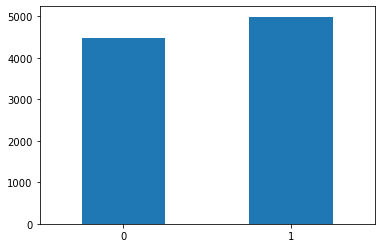

In [70]:
# Split OverallLevel in half, creating new feature to use as Target
df['OverallLevelSplit'] = np.where(df.OverallLevel == 1, 0, np.where(df.OverallLevel == 2, 0, 1))

# Display the new target feature's balance
df.OverallLevelSplit.value_counts().sort_index().plot(kind='bar', rot=0)

In [129]:
# Correlation for Overall Score Standardized
cor = pd.DataFrame(df.corrwith(df['OverallScoreStd']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallScoreStd,1.000000
OverallScore,0.943589
OverallLevel,0.752161
GradeAttendedPct,0.231152
GradeLevel,0.227430
TestInstance,0.182120
DaysAttended,0.100359
School_deID,0.066461
TeacherEthnicity,0.052380
ExpectedAttendanceDays,0.035928


In [150]:
# Drop columns whose p value is too high after viewing summary for OverallScoreStd
df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallLevel      9460 non-null   int64  
 1   TeacherEthnicity  9460 non-null   int64  
 2   OverallScoreStd   9460 non-null   float64
 3   TotalAssessments  9460 non-null   int64  
 4   TestInstance      9460 non-null   int64  
 5   Growth            9460 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 443.6 KB


In [151]:
# Correlation for Overall Score after dropping features
cor = pd.DataFrame(df.corrwith(df['OverallScoreStd']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallScoreStd,1.000000
OverallLevel,0.752161
Growth,0.278397
TestInstance,0.182120
TeacherEthnicity,0.052380
TotalAssessments,0.033933


### Linear Regression

In [152]:
X = df.loc[ : , df.columns != 'OverallScoreStd']
y = df[['OverallScoreStd']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(" X_train    y_train    X_test    y_test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

 X_train    y_train    X_test    y_test
(6622, 5) (6622, 1) (2838, 5) (2838, 1)


In [153]:
# Add constant
X = sm.add_constant(X)

# Run the model
lr_model = sm.OLS(y, X).fit()

In [154]:
# Dropped a few columns due to p-value being too high
# Also removed OverallScore due to Cond. No. being too high
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OverallScoreStd   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2861.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:43:14   Log-Likelihood:                 11302.
No. Observations:                9460   AIC:                        -2.259e+04
Df Residuals:                    9454   BIC:                        -2.255e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3223      0.003     98.664      0.000       0.316       0.329
OverallLevel         0.0923      0.001    108.343      0.000       0.091       0.094
TeacherEthnicity     0.0016      0.000      4.454      0.000       0.001       0.002
TotalAssessments    -0.0016      0.001     -2.364      0.018      -0.003      -0.000
TestInstance         0.0203      0.001     24.148      0.000       0.019       0.022
Growth              -0.0081      0.001     -6.900      0.000      -0.010      -0.006
==============================================================================
Omnibus:                     3160.140   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23245.100
Skew:                          -1.406   Prob(JB):                         0.00
Kurtosis:                      10.146   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""